<a href="https://colab.research.google.com/github/Doclikam/Machine-Learning-2/blob/main/week%203%20-%20timeseries/001_AQI_timeseries_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beijing Air-Quality Time Series Project**

**Exploratory Data Analysis Notebook**

In [60]:
#importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [146]:
df=pd.read_csv('/content/dataset.csv')

In [147]:
df.shape

(420768, 18)

In [148]:
#drop non consequential columns
df=df.drop(columns='No')

In [149]:
df.head()

year  month  day  hour PM2.5 PM10 SO2 NO2   CO  O3  TEMP    PRES   DEWP  \
0  2013      3    1     0     4    4   4   7  300  77  -0.7    1023  -18.8   
1  2013      3    1     1     8    8   4   7  300  77  -1.1  1023.2  -18.2   
2  2013      3    1     2     7    7   5  10  300  73  -1.1  1023.5  -18.2   
3  2013      3    1     3     6    6  11  11  300  72  -1.4  1024.5  -19.4   
4  2013      3    1     4     3    3  12  12  300  72    -2  1025.2  -19.5   

  RAIN   wd WSPM       station  
0    0  NNW  4.4  Aotizhongxin  
1    0    N  4.7  Aotizhongxin  
2    0  NNW  5.6  Aotizhongxin  
3    0   NW  3.1  Aotizhongxin  
4    0    N    2  Aotizhongxin

In [150]:
#converting the year	month	day	hour to date time index
df['date']=pd.to_datetime(df[['year','month','day','hour']])
#set the date column as the index
df.set_index('date',inplace=True)
#dropiing the columns 'year','month','day','hour'
df=df.drop(columns=['year','month','day','hour'])
df.head(3)

PM2.5 PM10 SO2 NO2   CO  O3  TEMP    PRES   DEWP RAIN  \
date                                                                        
2013-03-01 00:00:00     4    4   4   7  300  77  -0.7    1023  -18.8    0   
2013-03-01 01:00:00     8    8   4   7  300  77  -1.1  1023.2  -18.2    0   
2013-03-01 02:00:00     7    7   5  10  300  73  -1.1  1023.5  -18.2    0   

                      wd WSPM       station  
date                                         
2013-03-01 00:00:00  NNW  4.4  Aotizhongxin  
2013-03-01 01:00:00    N  4.7  Aotizhongxin  
2013-03-01 02:00:00  NNW  5.6  Aotizhongxin

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   PM2.5    420768 non-null  object
 1   PM10     420768 non-null  object
 2   SO2      420768 non-null  object
 3   NO2      420768 non-null  object
 4   CO       420768 non-null  object
 5   O3       420768 non-null  object
 6   TEMP     420768 non-null  object
 7   PRES     420768 non-null  object
 8   DEWP     420768 non-null  object
 9   RAIN     420768 non-null  object
 10  wd       420768 non-null  object
 11  WSPM     420768 non-null  object
 12  station  420768 non-null  object
dtypes: object(13)
memory usage: 44.9+ MB


We see that the PM2.5	PM10,	SO2,	NO2	,CO	,O3 , TEMP,	PRES	DEWP,	RAIN are all objects. We can convert this into floats so we can use them to visulaize the data further. Where there are missing values the missing value has been imputed with '?'. Consequetly let replace the '?' with np.nan

In [152]:
#list object columns
object_cols= ['PM2.5', 'PM10', 'SO2', 'NO2' ,'CO','O3' , 'TEMP', 'PRES', 'DEWP', 'RAIN']
#converting the columns to floats
for col in object_cols:
  #replacing '?' with Nan
  df[col]=df[col].replace('?', np.nan)
  #converting the object type to float type
  df[col]=df[col].astype(float)



In [153]:
#checking for percentage of missigness in every column
per_missingness=df.isnull().sum().sort_values(ascending=False)/len(df)*100
# transform the array into a dataframe
per_missingness = pd.DataFrame(per_missingness.reset_index())
# add column names to the dataframe
per_missingness.columns = ['variable', 'na_percentage']
per_missingness.head(10)


variable  na_percentage
0       CO       4.919813
1       O3       3.155421
2      NO2       2.879497
3      SO2       2.143937
4    PM2.5       2.076916
5     PM10       1.532674
6     DEWP       0.095777
7     TEMP       0.094589
8     PRES       0.093401
9     RAIN       0.092688

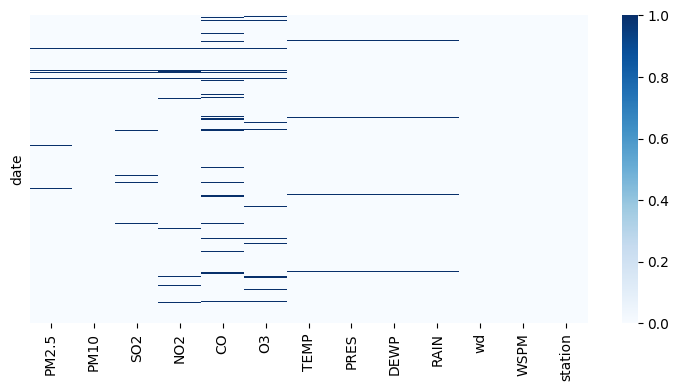

In [154]:
plt.figure(figsize=(9,4))
sns.heatmap(df.isnull(), yticklabels=False, cmap="Blues")
plt.show()


From the data we see that the PM2.5	PM10	SO2	NO2	CO	O3	TEMP	PRES	have missing values. As this is a time series interpolation is a great way to impute the missing values, however let's have a look at the trend and seasonality of the data for these variables to figure out a suitable imputation method.

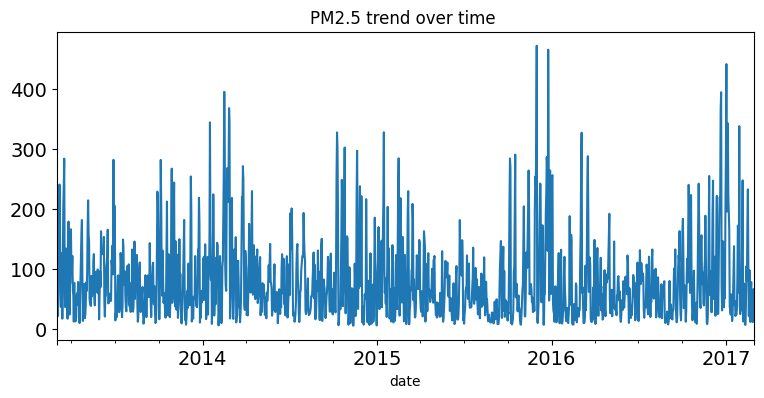

In [ ]:
title='PM2.5 trend over time '
# daily mean PM2.5
df['PM2.5'].resample(rule='D').mean().plot(figsize=(9,4), title=title, fontsize=14)
plt.show()

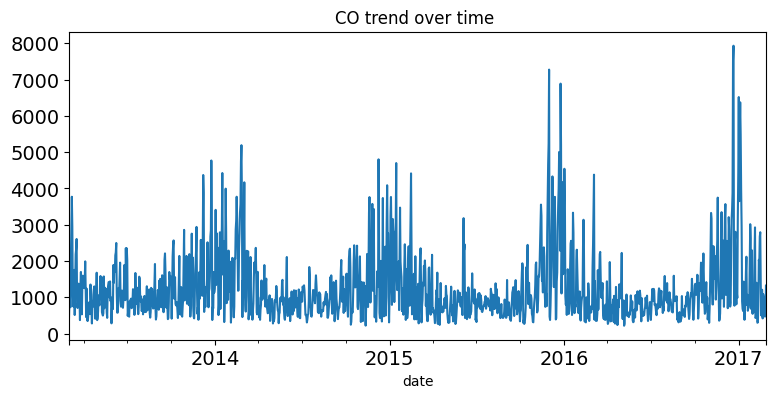

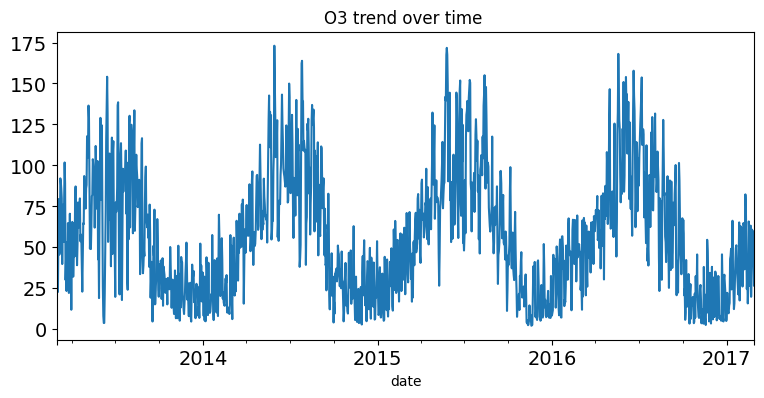

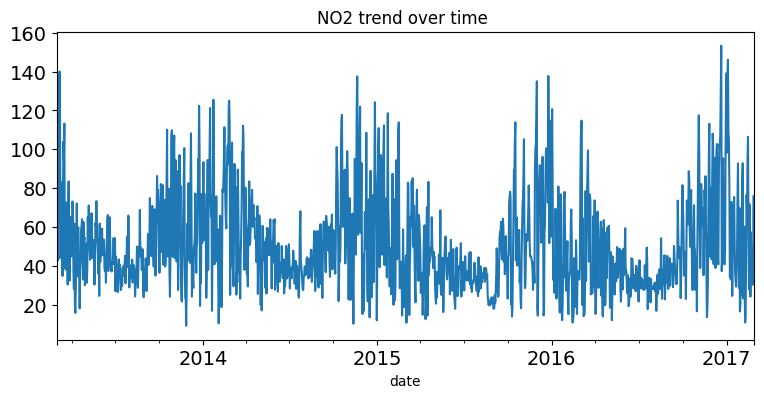

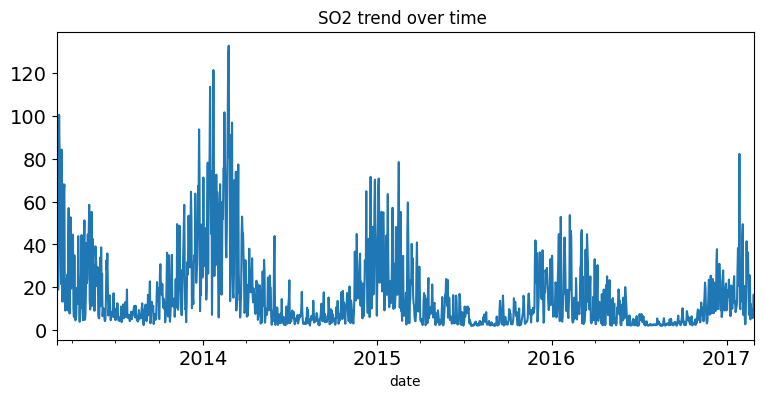

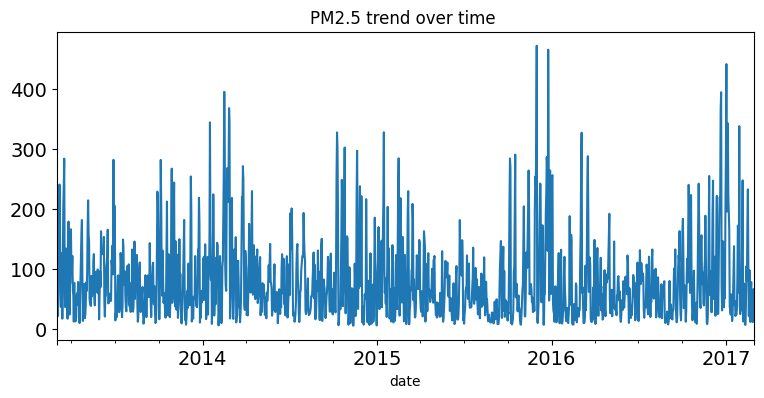

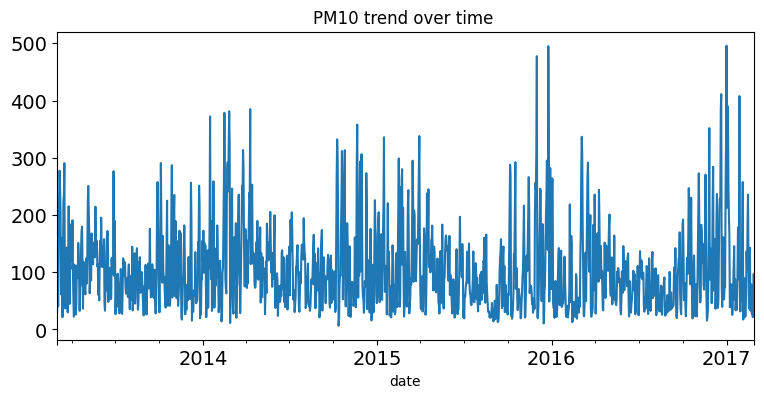

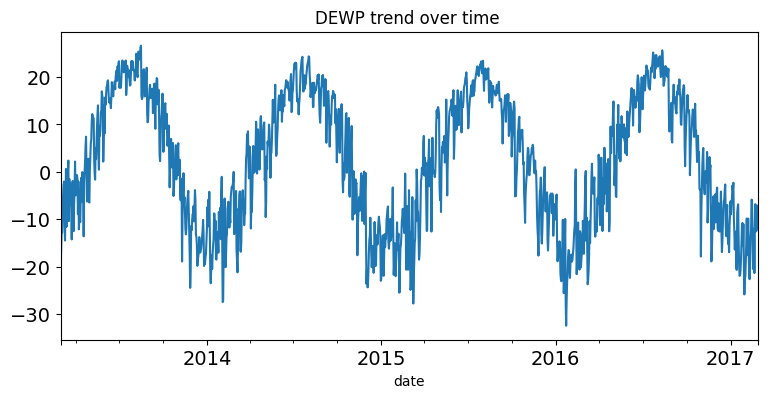

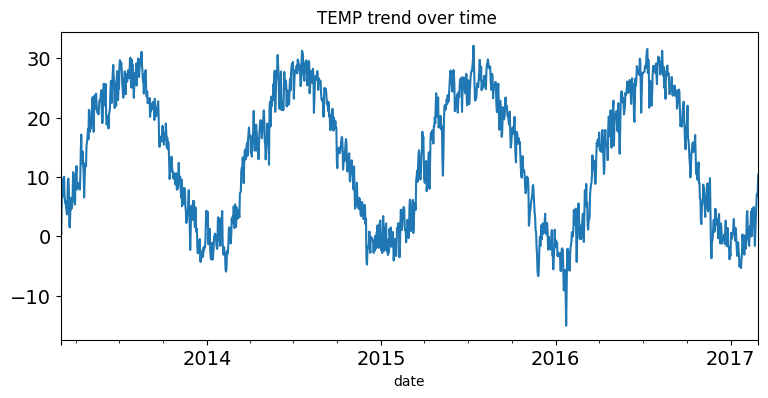

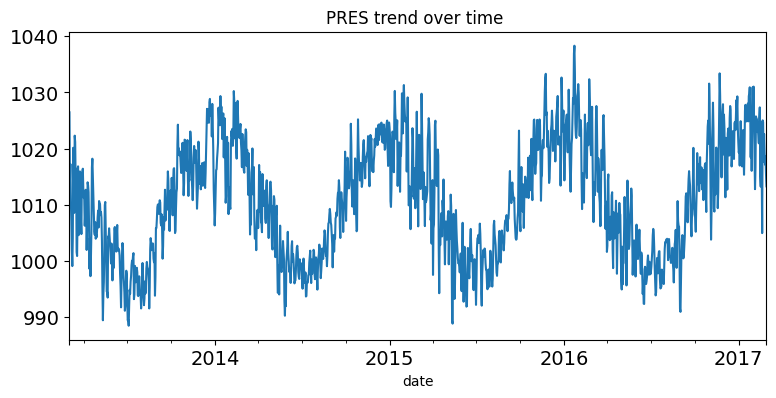

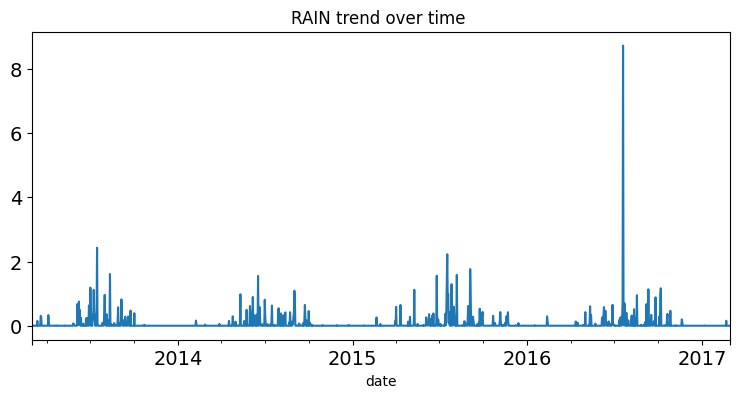

In [ ]:
cols=['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'DEWP', 'TEMP', 'PRES',
       'RAIN' ]
for col in cols:
  title=col+' trend over time '
  # daily mean for the variables
  df[col].resample(rule='D').mean().plot(figsize=(9,4), title=title, fontsize=14)
  plt.show()

From the plot we note that:
1. there is a slight presence of trend
2. and there is a clear presence of seasonality

Therefore, in this case we decide to use the "seasonal adjustment + linear interpolation" imputation method

In [155]:
#keeping an original copy of the data before interpolation
df_copy=df.copy()

In [156]:
#interpolating the dataset
df=df.interpolate(method='time')

In [157]:
#checking if there are missing values after interpolation
df.isna().sum().sum()


0

Perfect!!Now there is no missingness.


# **Exploratory Data Analaysis**

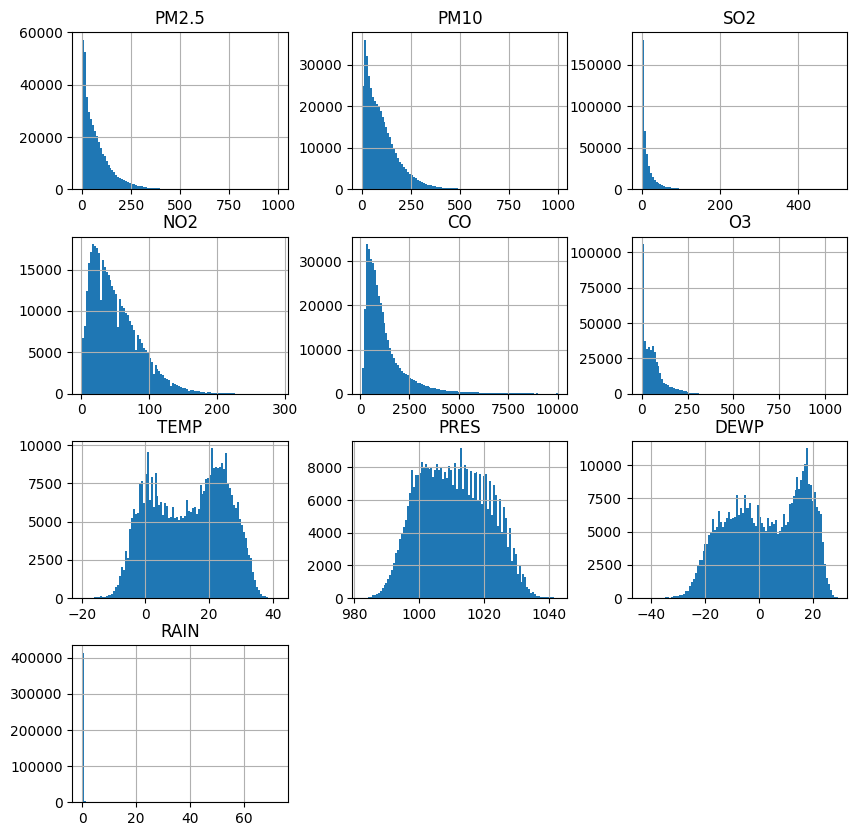

In [ ]:
#distribution of the data for each column
# check the distribution of independent variables
df.hist(bins=100, figsize=[10, 10])
plt.show()

The 'PM2.5', 'PM10', 'SO2', 'NO2' ,'CO','O3' appear to left skewed, while the 'TEMP', 'PRES', 'DEWP', 'RAIN'  have almost a normal distribution.

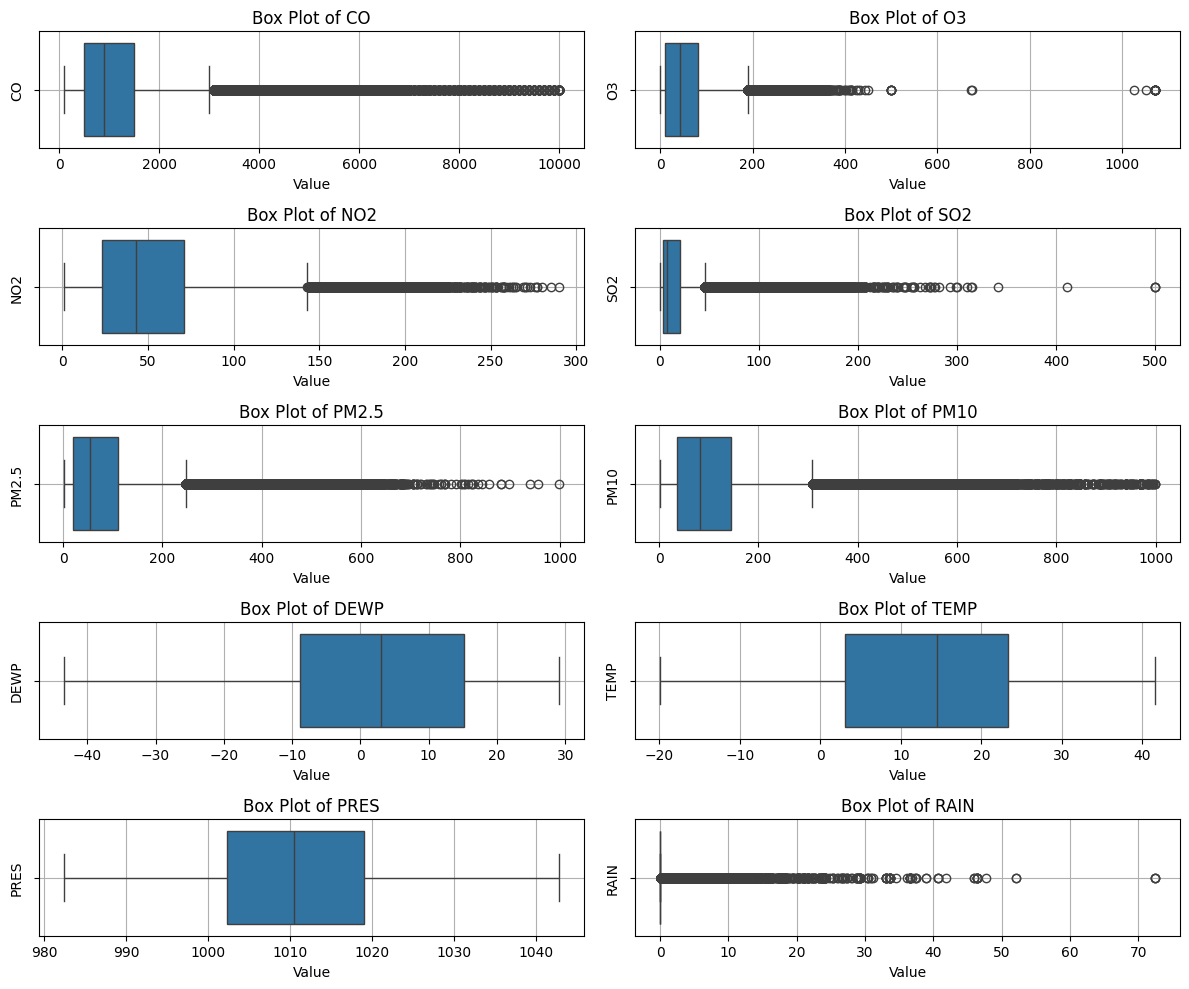

In [ ]:
cols = ['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'DEWP', 'TEMP', 'PRES', 'RAIN']
num_plots = len(cols)

# Create a 5x2 grid to accommodate all 10 variables
fig, axes = plt.subplots(5, 2, figsize=(12, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    # Box plot for each individual column
    sns.boxplot(x=df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel(col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()


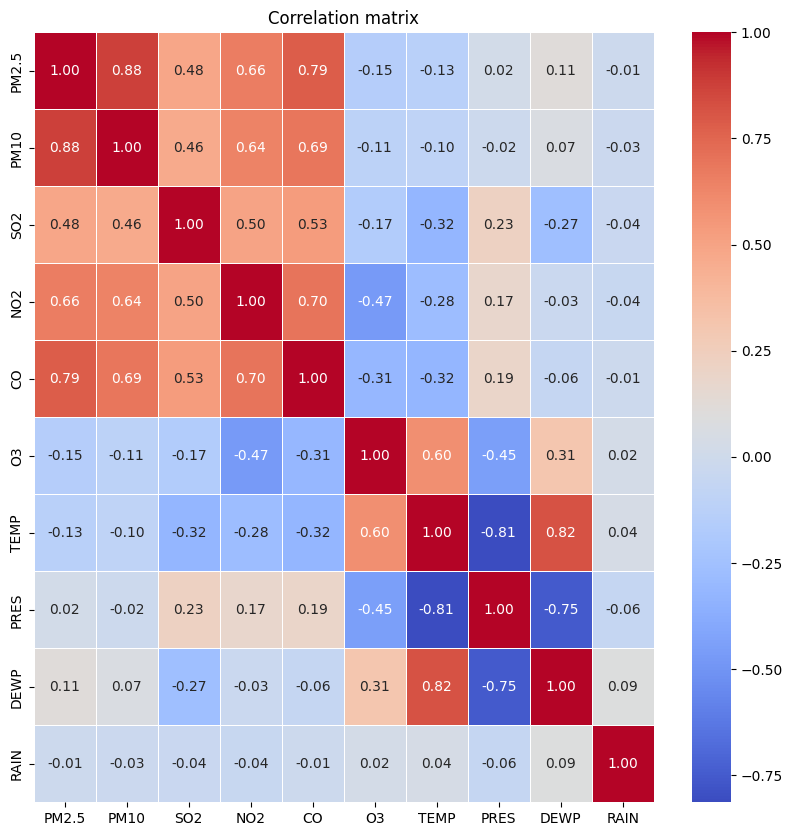

In [ ]:
#Correlation Matrix
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

#create heatmap to visualize correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

Some of the columns have a very high correlation. The 'CO',  'NO2', 'PM2.5', 'PM10' move together.
When there is rain the pollutants seem to decrease. one of the insights is that pollutant air has strong correlation with the temperature. Temp and Rain will be significant in assessing the behavior of pollutants.


<Figure size 1500x1500 with 0 Axes>

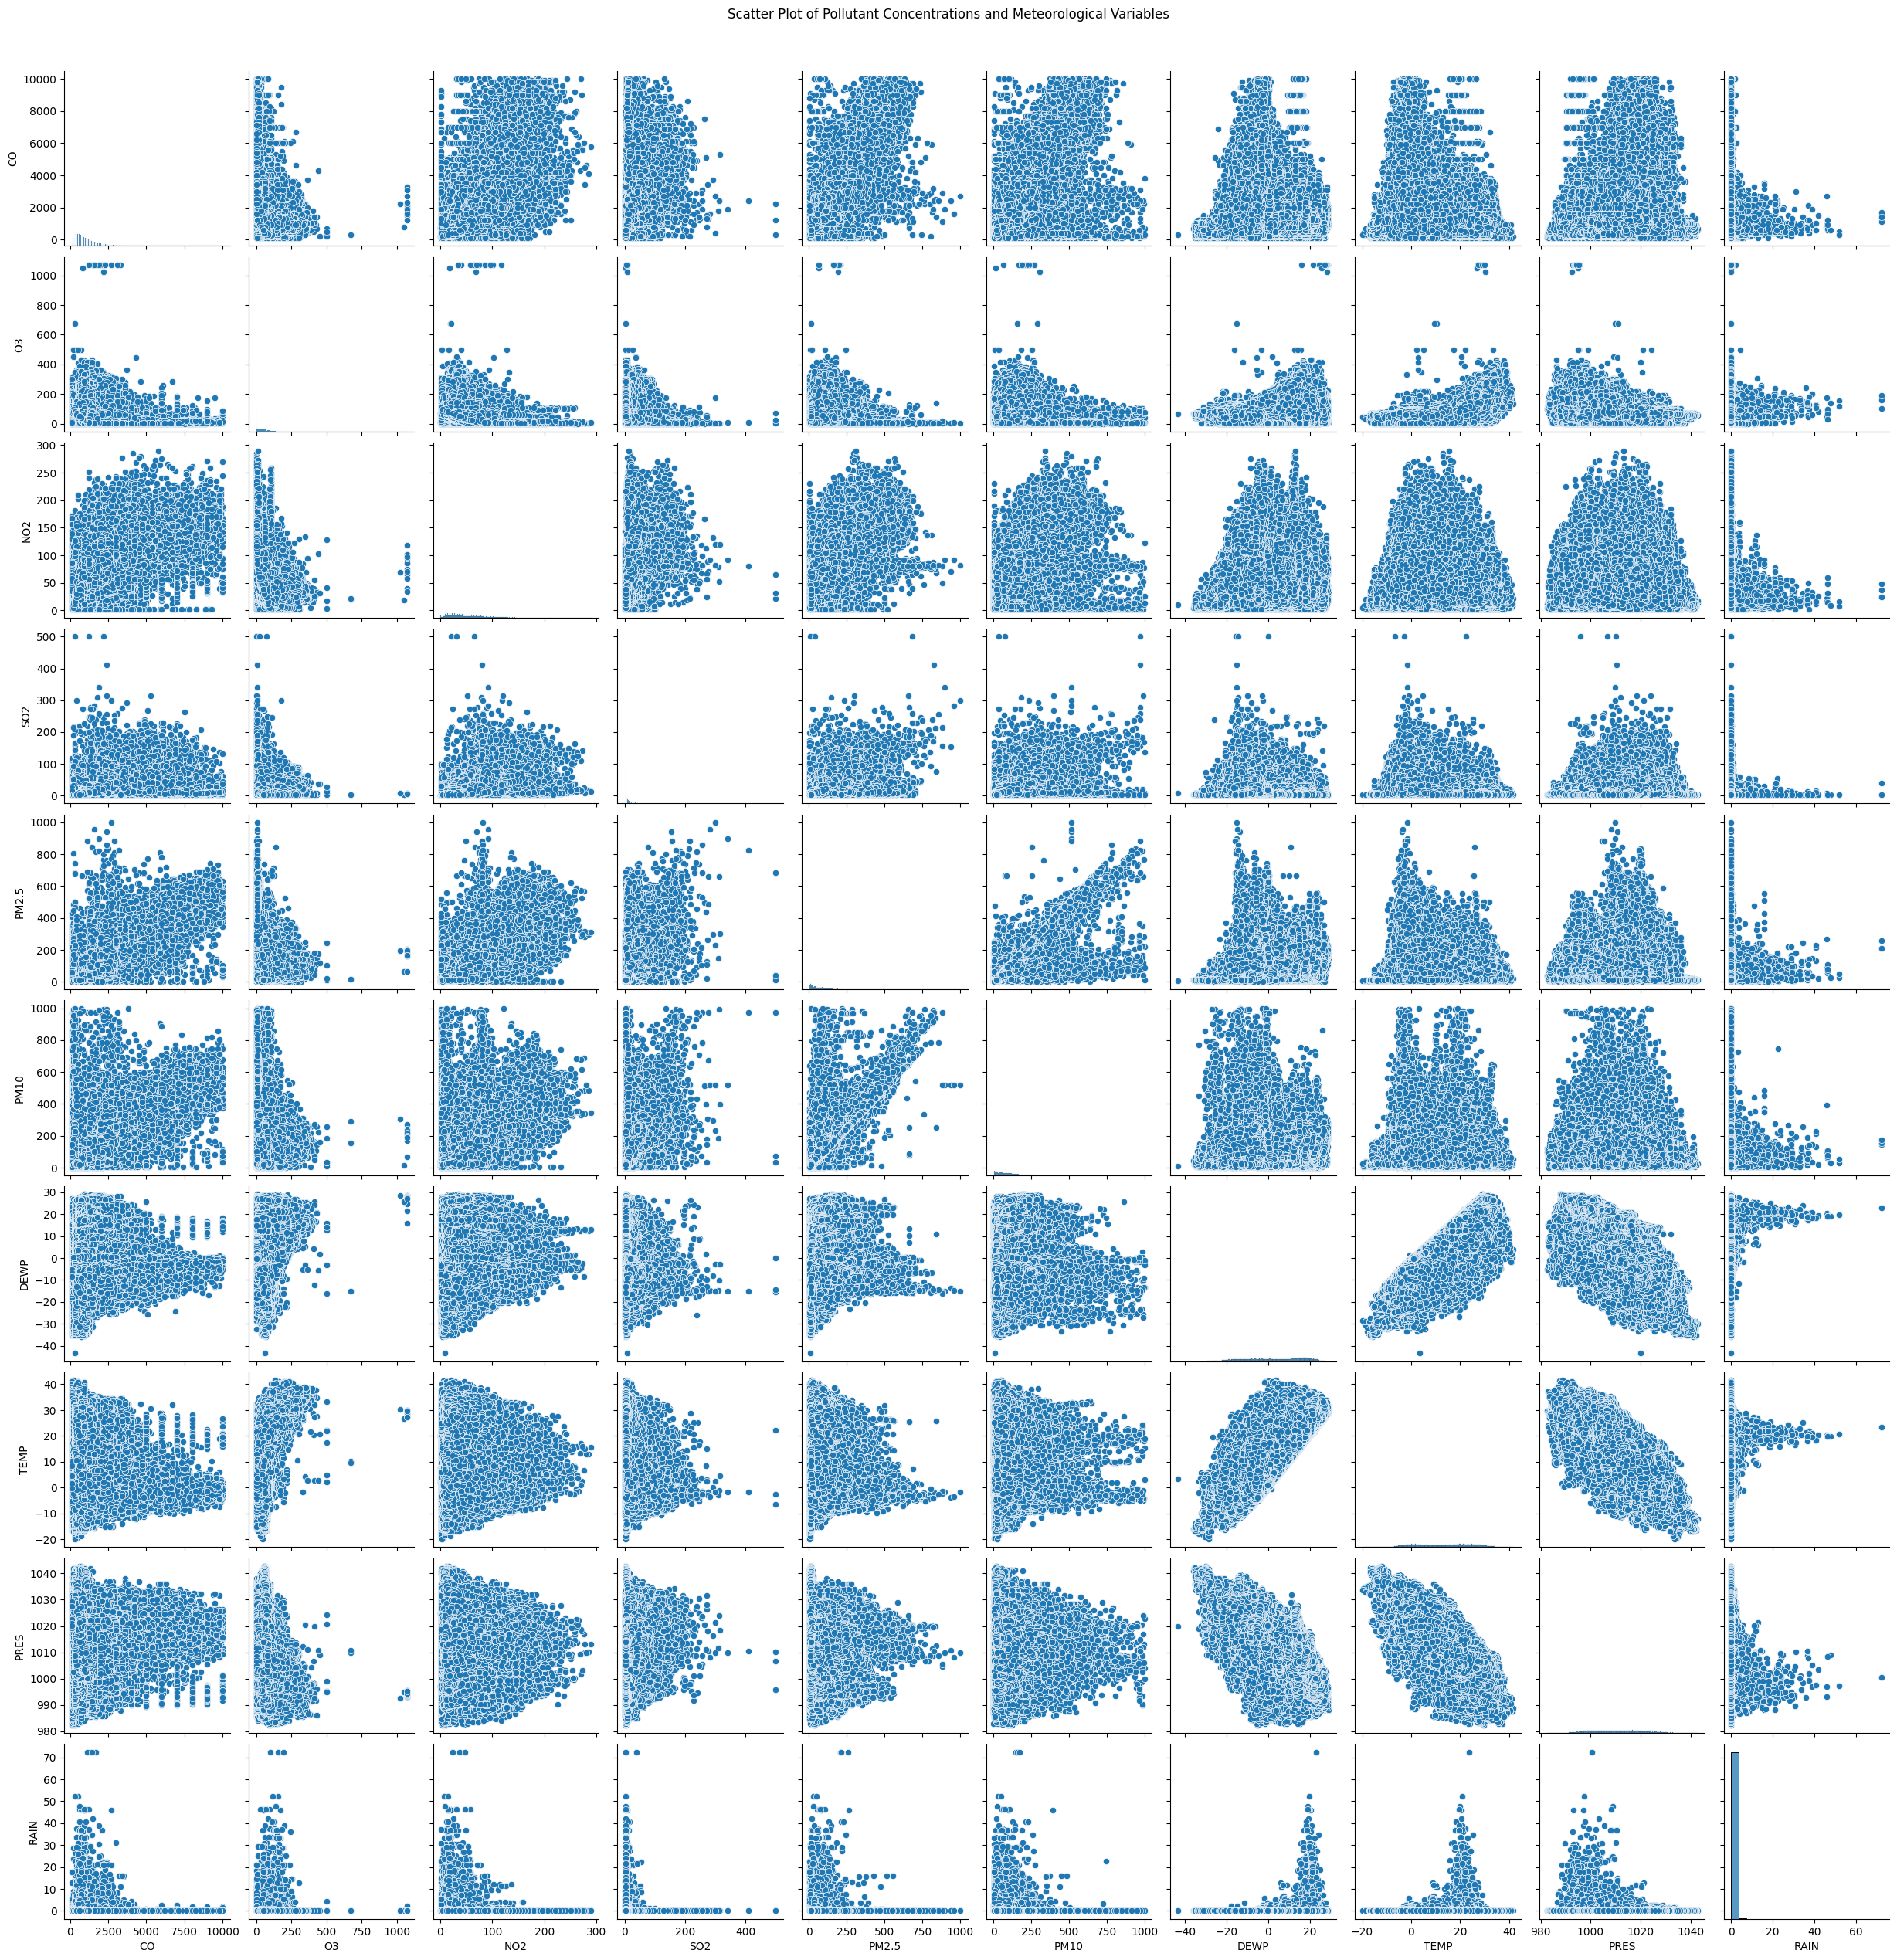

In [ ]:
# Plot scatter plots for each pair of variables to identify outliers
plt.figure(figsize=(15, 15))
sns.pairplot(df[cols], kind='scatter')
plt.suptitle('Scatter Plot of Pollutant Concentrations and Meteorological Variables', y=1.02)
plt.show()


In [ ]:
df=df.drop(columns=[['PRES',	'DEWP',	'wd	', 'WSPM', 'station']])

Let's have a look at how temperature and pollutants change with time.


Text(0, 0.5, 'PM2.5')

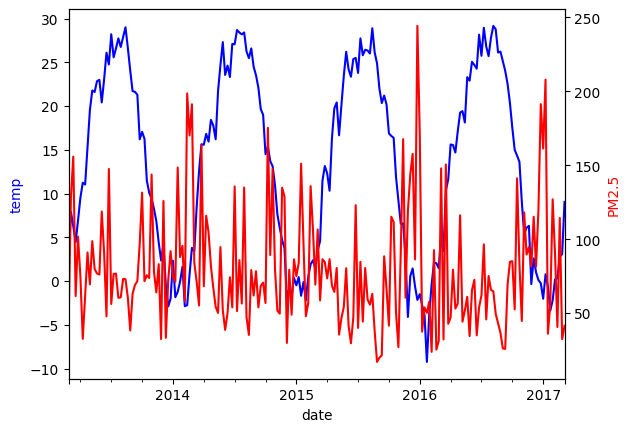

In [162]:
#temperature and pm2.5 over time
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('temp', color='blue')
ax2 = ax.twinx()
ax2 = df['PM2.5'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel( 'PM2.5', color='red')


Text(0, 0.5, 'SO2')

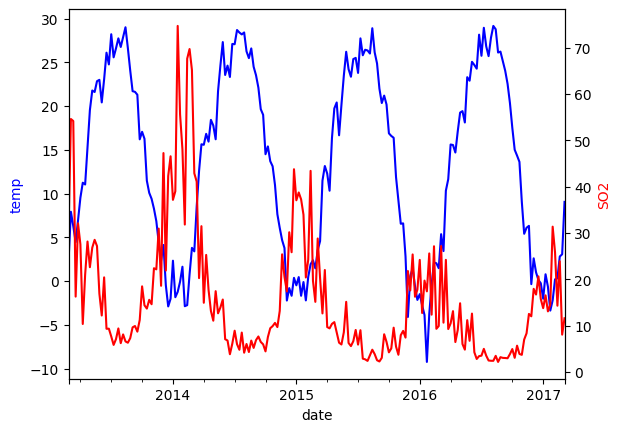

In [160]:
#temperature and pm2.5 over time
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('temp', color='blue')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('SO2', color='red')

Temparature and S02 levels are negatively correlated.

Text(0, 0.5, 'CO')

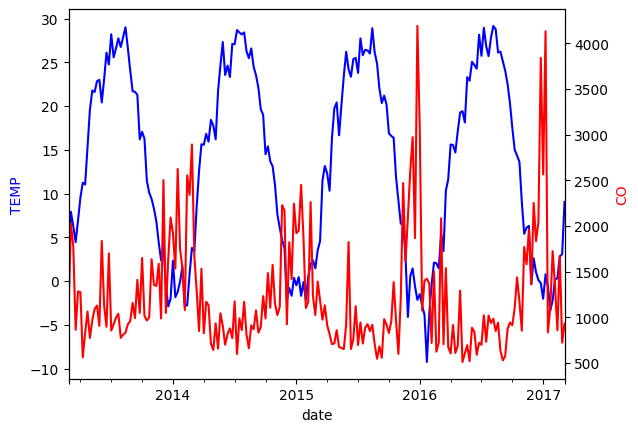

In [167]:
 #TEMP and CO2 over time
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('TEMP', color='blue')
ax2 = ax.twinx()
ax2 = df['CO'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('CO', color='red')

Temperature and CO levels are highly correlated

Text(0, 0.5, 'NO2')

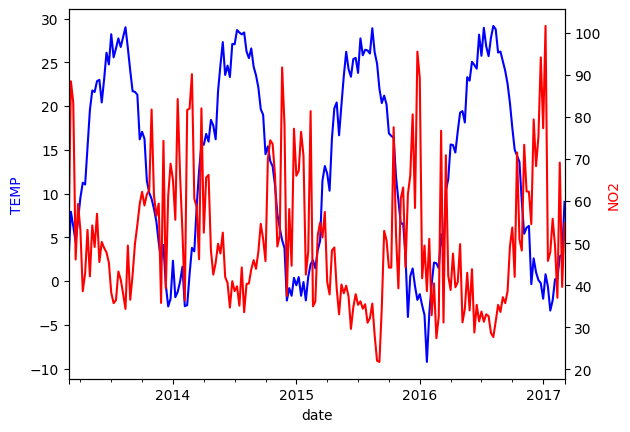

In [168]:
 #temp and NO2 over time
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('TEMP', color='blue')
ax2 = ax.twinx()
ax2 = df['NO2'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('NO2', color='red')

This is the same for temperature and NO2 levels


Text(0, 0.5, 'O3')

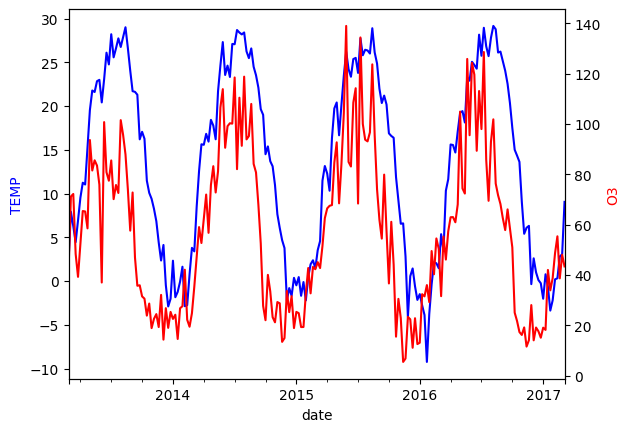

In [169]:
 #TEMP and O3 over time
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('TEMP', color='blue')
ax2 = ax.twinx()
ax2 = df['O3'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('O3', color='red')

Temperature and ozone and positively correlated. Warmer temperature  lead to increased ozone production.

Text(0, 0.5, 'SO2')

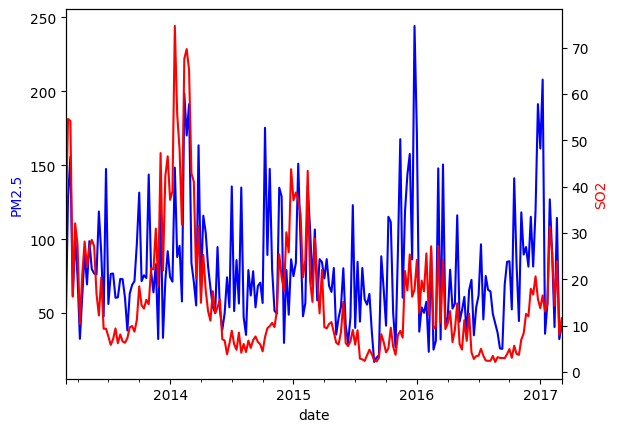

In [172]:
#pm2.5 and SO2 over time
fig, ax = plt.subplots()

ax1 = df['PM2.5'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('PM2.5', color='blue')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('SO2', color='red')

Text(0, 0.5, 'CO')

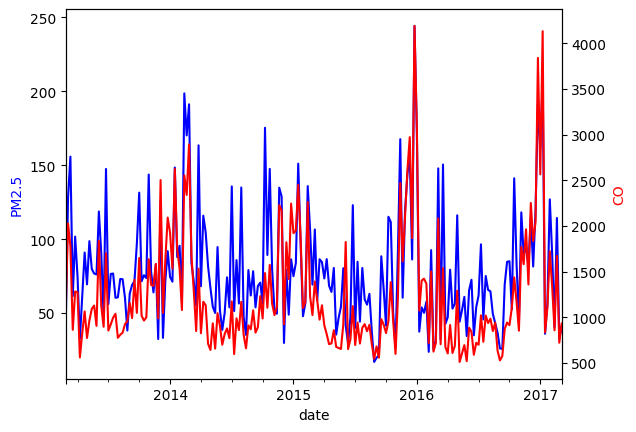

In [170]:

 #pm2.5 and CO2 over time
fig, ax = plt.subplots()

ax1 = df['PM2.5'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('PM2.5', color='blue')
ax2 = ax.twinx()
ax2 = df['CO'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('CO', color='red')


PM2.5 levels increase with 'CO' 'NO2', 'SO2' levels over time

Text(0, 0.5, 'O3')

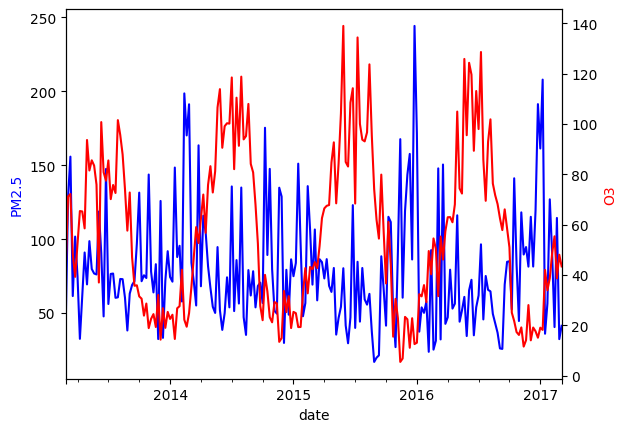

In [171]:
 #TEMP and O3 over time
fig, ax = plt.subplots()

ax1 = df['PM2.5'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('PM2.5', color='blue')
ax2 = ax.twinx()
ax2 = df['O3'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('O3', color='red')

In contrast the PM2.5 levels are negatively correlated with ozone.

Text(0, 0.5, 'CO')

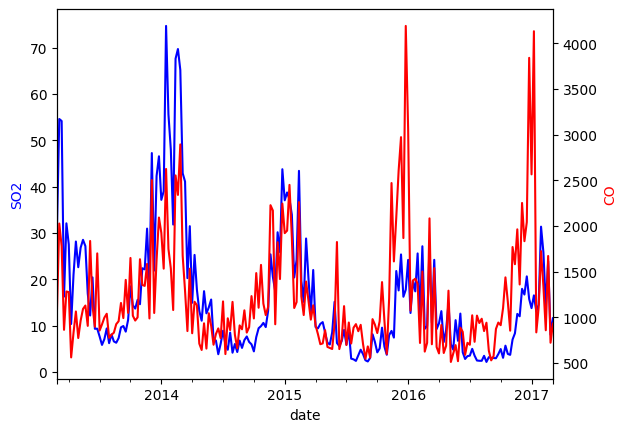

In [174]:
#so2 and co over time

fig, ax = plt.subplots()

ax1 = df['SO2'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('SO2', color='blue')
ax2 = ax.twinx()
ax2 = df['CO'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('CO', color='red')


S02 and  CO are highly correlated

Text(0, 0.5, 'NO2')

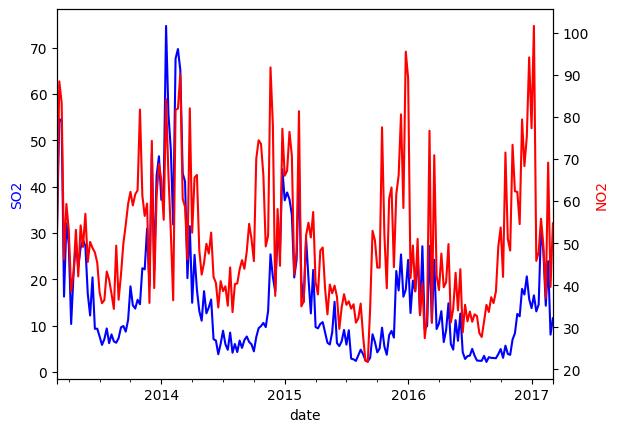

In [175]:
#so2 and NO2 over time

fig, ax = plt.subplots()

ax1 = df['SO2'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('SO2', color='blue')
ax2 = ax.twinx()
ax2 = df['NO2'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('NO2', color='red')

SO2  and NO2 are also positively correlated.

Text(0, 0.5, 'SO2')

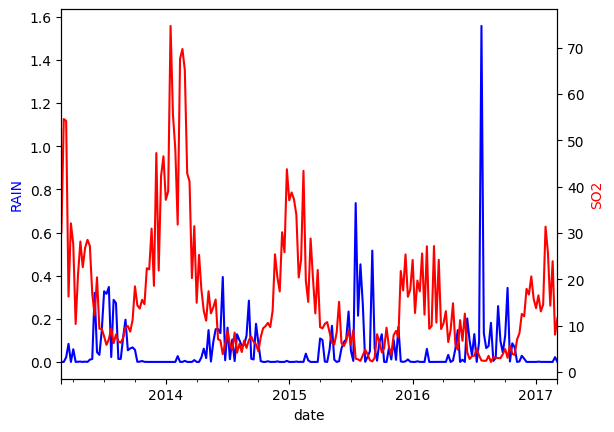

In [166]:
 #Rain and pm2.5 over time
fig, ax = plt.subplots()

ax1 = df['RAIN'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('RAIN', color='blue')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('SO2', color='red')


It appears that when it rain s02 levels decrease.

**Seasonal decomposition**

As for now let's examine twro variables pm2.5 and SO2

In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose

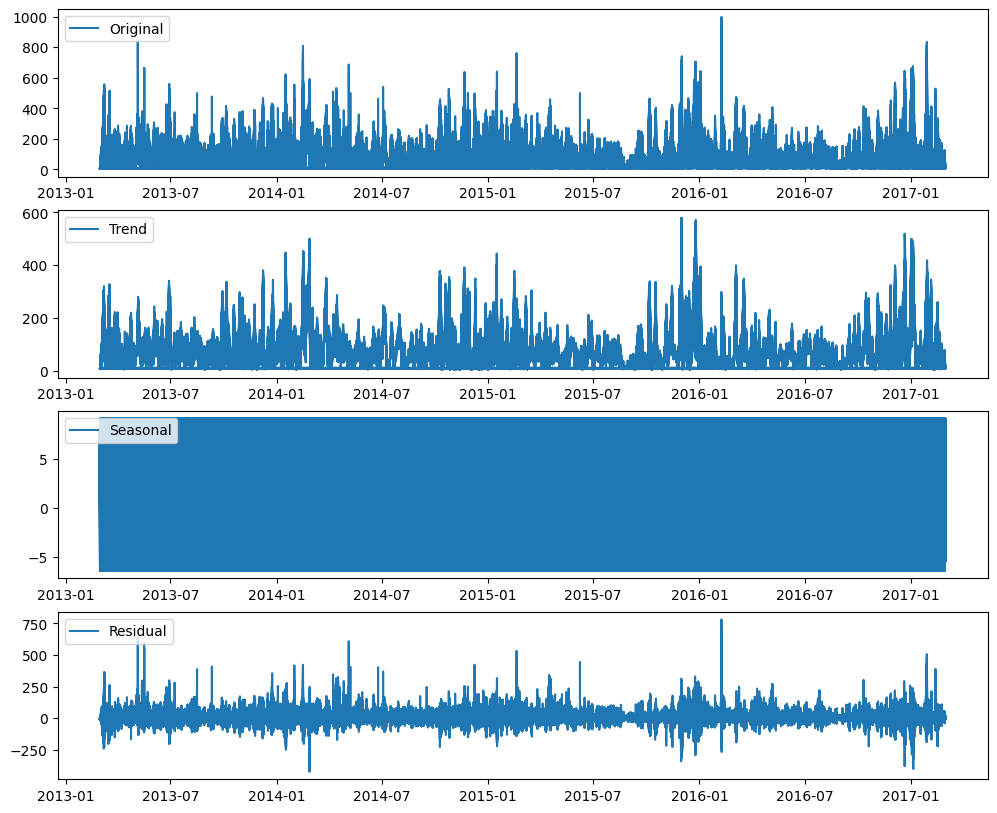

In [196]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['PM2.5'], model='additive', period=24)# Assuming daily seasonality (24 hours)

# Components to plot
components = {'Original': df['PM2.5'],
              'Trend': decomposition.trend,
              'Seasonal': decomposition.seasonal,
              'Residual': decomposition.resid}

# Plot all components in a loop
plt.figure(figsize=(12, 10))
for i, (title, data) in enumerate(components.items(), 1):
    plt.subplot(4, 1, i)
    plt.plot(df.index, data, label=title)
    plt.legend(loc='upper left')


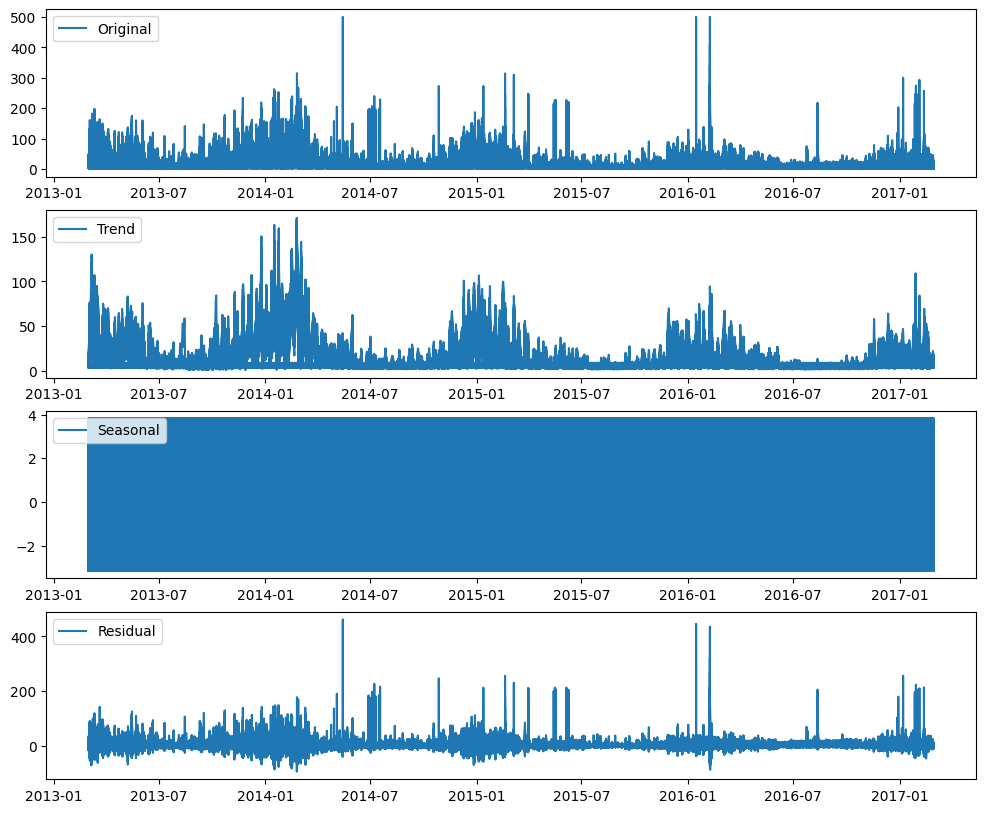

In [197]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['SO2'], model='additive', period=24)# Assuming daily seasonality (24 hours)

# Components to plot
components = {'Original': df['SO2'],
              'Trend': decomposition.trend,
              'Seasonal': decomposition.seasonal,
              'Residual': decomposition.resid}

# Plot all components in a loop
plt.figure(figsize=(12, 10))
for i, (title, data) in enumerate(components.items(), 1):
    plt.subplot(4, 1, i)
    plt.plot(df.index, data, label=title)
    plt.legend(loc='upper left')


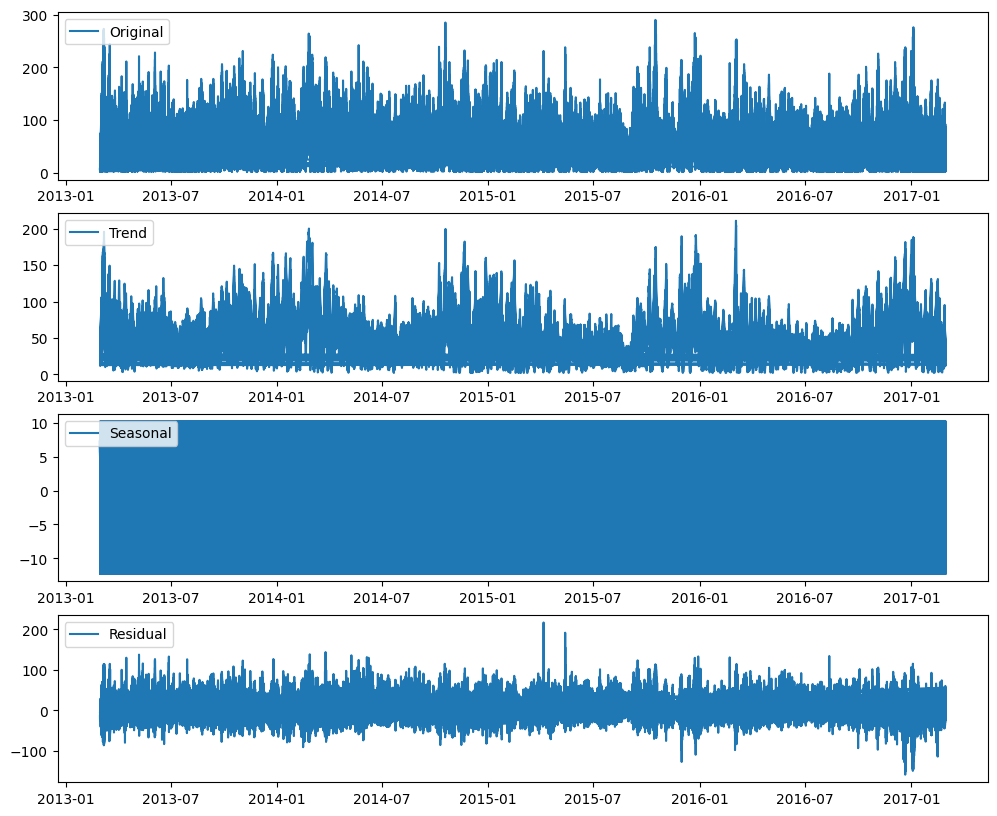

In [198]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['NO2'], model='additive', period=24)# Assuming daily seasonality (24 hours)

# Components to plot
components = {'Original': df['NO2'],
              'Trend': decomposition.trend,
              'Seasonal': decomposition.seasonal,
              'Residual': decomposition.resid}

# Plot all components in a loop
plt.figure(figsize=(12, 10))
for i, (title, data) in enumerate(components.items(), 1):
    plt.subplot(4, 1, i)
    plt.plot(df.index, data, label=title)
    plt.legend(loc='upper left')

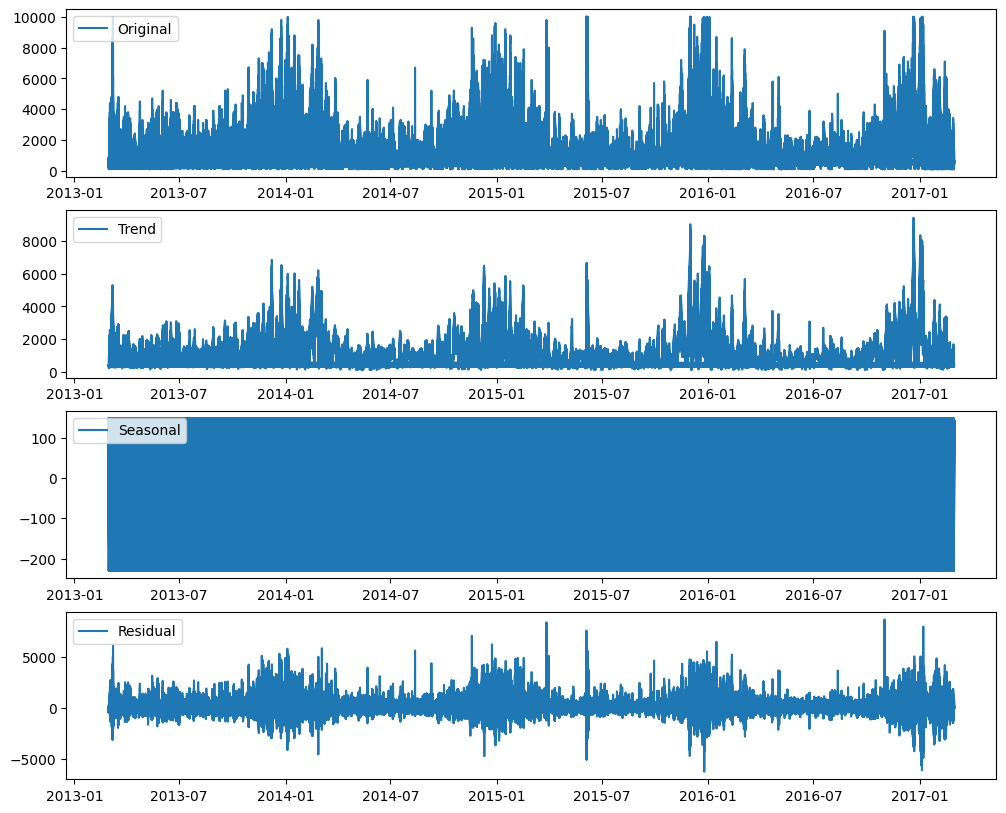

In [193]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['CO'], model='additive', period=24)# Assuming daily seasonality (24 hours)

# Components to plot
components = {'Original': df['CO'],
              'Trend': decomposition.trend,
              'Seasonal': decomposition.seasonal,
              'Residual': decomposition.resid}

# Plot all components in a loop
plt.figure(figsize=(12, 10))
for i, (title, data) in enumerate(components.items(), 1):
    plt.subplot(4, 1, i)
    plt.plot(df.index, data, label=title)
    plt.legend(loc='upper left')

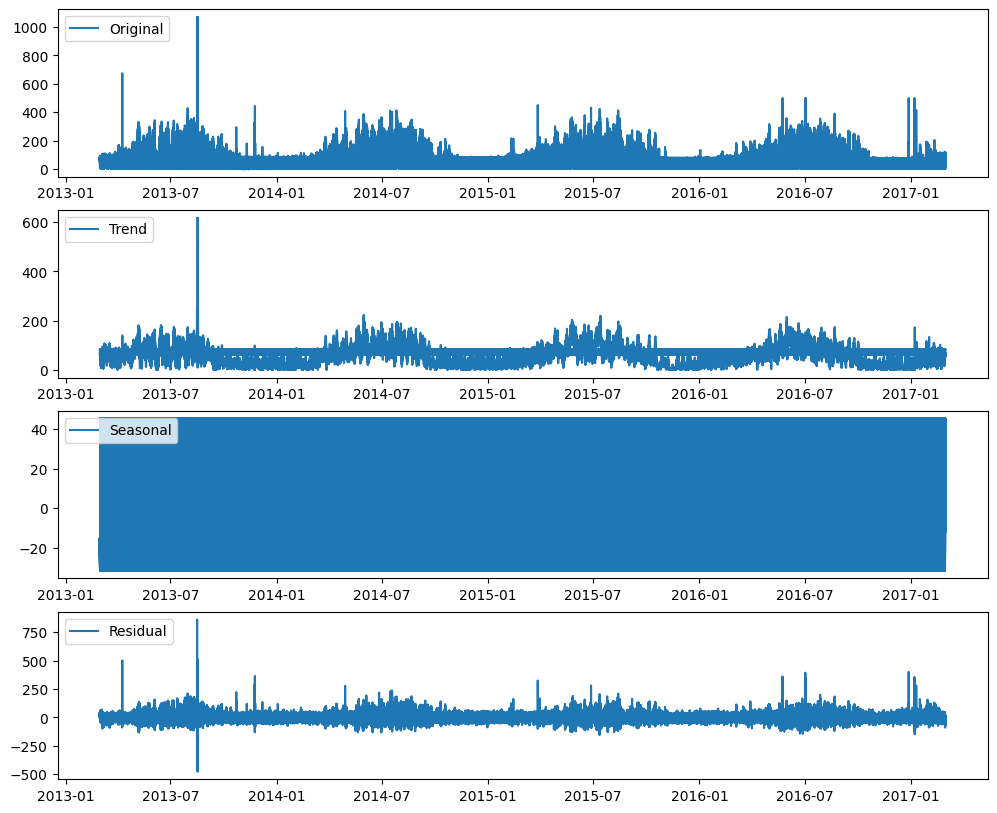

In [199]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['O3'], model='additive', period=24)# Assuming daily seasonality (24 hours)

# Components to plot
components = {'Original': df['O3'],
              'Trend': decomposition.trend,
              'Seasonal': decomposition.seasonal,
              'Residual': decomposition.resid}

# Plot all components in a loop
plt.figure(figsize=(12, 10))
for i, (title, data) in enumerate(components.items(), 1):
    plt.subplot(4, 1, i)
    plt.plot(df.index, data, label=title)
    plt.legend(loc='upper left')

Let's examine the trend for these variables more.

In [218]:
cols=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN']
df_weekly=pd.DataFrame(df[cols].resample(rule='w').mean())

# **ACF & PACF**

In [207]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

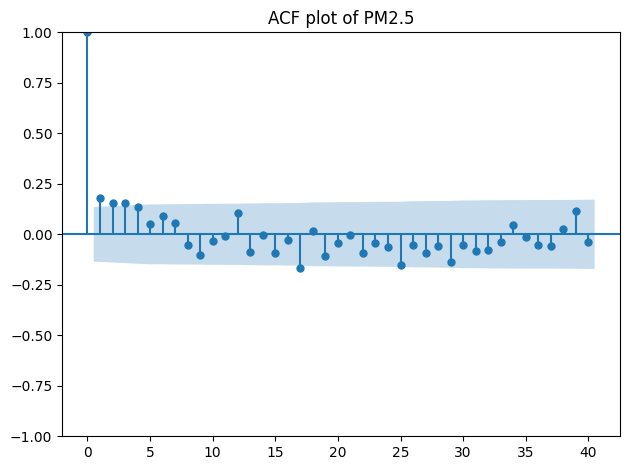

In [219]:
#create acf plot of pm2.5
title='ACF plot of PM2.5'
plot_acf(df_weekly['PM2.5'],title=title, lags=40)
plt.tight_layout()
plt.show()

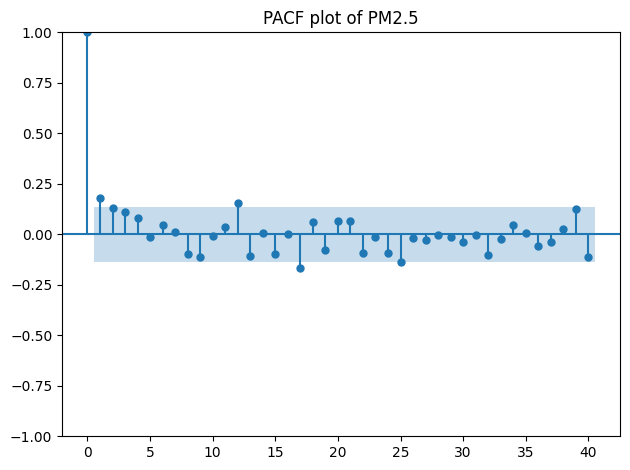

In [210]:
#create acf plot of pm2.5
title='PACF plot of PM2.5'
plot_pacf(df_weekly['PM2.5'],title=title, lags=40)
plt.tight_layout()
plt.show()